In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from struct import unpack
import matplotlib.animation as animation 
#%matplotlib inline

In [57]:
def leapFrog(a,pos_initial,vel_initial,t,mass):
    vMid = vel_initial + (0.5)*a*t
    pos = pos_initial + vMid*t
    a = calcAccel(pos,mass)
    v = vMid + (0.5)*a*t
    return pos,v,a

In [58]:
earth = np.array([1,0])
sun = np.array([0,0])
jupiter = np.array([5.2,0])
v_earth = [0, 1.99*10**-7]
v_sun = [0,0]
v_jupiter = [0,8.736*10**-8]
G = 2*10**-44
m_sun = 1.99*10**30
m_earth = 5.972*10**24
m_jupiter = 1.898*10**27
mass = [m_earth,m_sun,m_jupiter]
pos_initial = np.array([earth,sun,jupiter])
vel_initial = np.array([v_earth,v_sun,v_jupiter])


def calcAccel(x,m):
    a=np.zeros_like(x)
    nbodies = x.shape[0]
    for i in range(nbodies):
        for j in range(nbodies):
            r=x[j]-x[i]
            if i !=j:
                a[i]=a[i]+r*G*m[j]/pow(np.vdot(r,r),1.5)
    return a



In [59]:
t_final = 5*365*24*60*60
dt = 60*60*12
a = calcAccel(pos_initial,mass)
pos_results = []
t = 0
while (t<t_final):
    pos_initial,vel_initial,a = leapFrog(a,pos_initial,vel_initial,dt,mass)
    t = t + dt
    pos_results.append(pos_initial)
pos_results = np.array(pos_results)


In [63]:
earth_x = pos_results[:,0,0]
earth_y = pos_results[:,0,1]
sun_x =  pos_results[:,1,0]
sun_y = pos_results[:,1,1]
jupiter_x =  pos_results[:,2,0]
jupiter_y = pos_results[:,2,1]
data0 = np.array([earth_x,earth_y])
data1 = np.array([sun_x,sun_y])
data2 = np.array([jupiter_x,jupiter_y])
#plt.plot(earth_x ,earth_y,'.')
#plt.plot(sun_x,sun_y,'.')
#plt.plot(jupiter_x,jupiter_y,'.')

In [66]:
num = 50 
def update_line(num, data0,data1,data2, line):
    '''num - the point in the array where you want to stop plotting (how many timesteps!)
       data - the data you want to plot [x,y]
       line - the formatting you want for the plot'''  
    line0.set_data(data0[..., num])
    line1.set_data(data1[..., num])
    line2.set_data(data2[..., num])
    return line0,line1,line2,

TypeError: update_line() takes exactly 5 arguments (3 given)

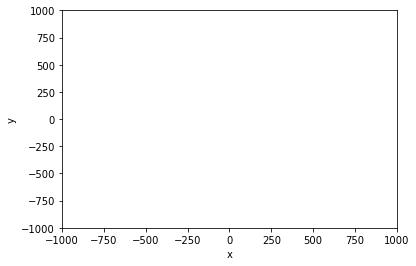

In [65]:
fig1 = plt.figure()

l, = plt.plot([], [], '.',ms=30)#set up what the plot will initial look like
                                #can also give commands on formatting your points
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
plt.xlabel('x')
plt.ylabel('y')
line0_ani = animation.FuncAnimation(fig1, update_line, 50, fargs=(data0, l),interval=100, blit=True)
line1_ani = animation.FuncAnimation(fig1, update_line, 50, fargs=(data1, l),interval=100, blit=True)
line2_ani = animation.FuncAnimation(fig1, update_line, 50, fargs=(data2, l),interval=100, blit=True)
#call the animation function and tell it:
#the name of the figure 
#the name of the method that updates the figure
#how many times you want to update the figure (how many timesteps!)
#fargs= any other arguments that the update_line method needs
#interval= how long each timestep should last

line_ani.save('blackhole_animation.mp4')